In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_parquet('final_data.parquet')

In [4]:
from sklearn.utils import shuffle 

spam_emails = df[df['label'] == 1]
normal_emails = df[df['label'] == 0]

undersampled_normal_emails = normal_emails.sample(n=len(spam_emails), random_state=42)

balanced_df = pd.concat([spam_emails, undersampled_normal_emails])

balanced_df = shuffle(balanced_df, random_state=42)

from sklearn.model_selection import train_test_split

X = balanced_df.drop(columns=['label', 'SourceFile', 'Subject', 'Recipients', 'Sender', 'RawEmailBody', 'PlainTextEmailBody', 'processed_text', 'clean_text', 'sentiment'], axis=1)
y = balanced_df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)

In [38]:
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [39]:
from sklearn.metrics import mean_squared_error
from math import sqrt
train_preds = knn_model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.3053379283916925

In [40]:
test_preds = knn_model.predict(X_test)
mse = mean_squared_error(y_test, test_preds)
rmse = sqrt(mse)
rmse

0.3846409150362465

In [41]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, list(map(int, test_preds))))

Accuracy: 0.7678630227197892


The best k value is: 5


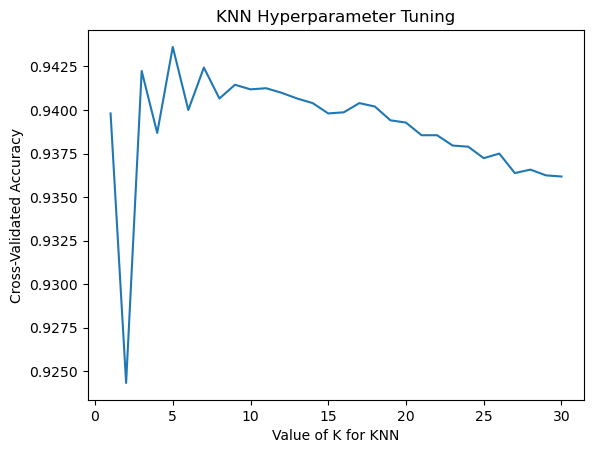

In [36]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


# 2. Standardize your features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Set up a range of k values to test
k_range = range(1, 31)

# 4. Perform cross-validation for each k
cv_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_scaled, y, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

# 5. Determine the best k
best_k = k_range[np.argmax(cv_scores)]
print(f"The best k value is: {best_k}")

# 6. Plot the results
plt.plot(k_range, cv_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Hyperparameter Tuning')
plt.show()

In [56]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# 3. Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 4. Train the k-NN classifier with k=5 (you can choose the best k found earlier)
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

# 5. Make predictions on the test set
y_pred = knn.predict(X_test)

# 6. Evaluate the classifier
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


Accuracy: 0.7955218966084953
Confusion Matrix:
[[1198  364]
 [ 257 1218]]
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.77      0.79      1562
           1       0.77      0.83      0.80      1475

    accuracy                           0.80      3037
   macro avg       0.80      0.80      0.80      3037
weighted avg       0.80      0.80      0.80      3037



In [57]:
y_pred_prob = knn.predict_proba(X_test)[:, 1]

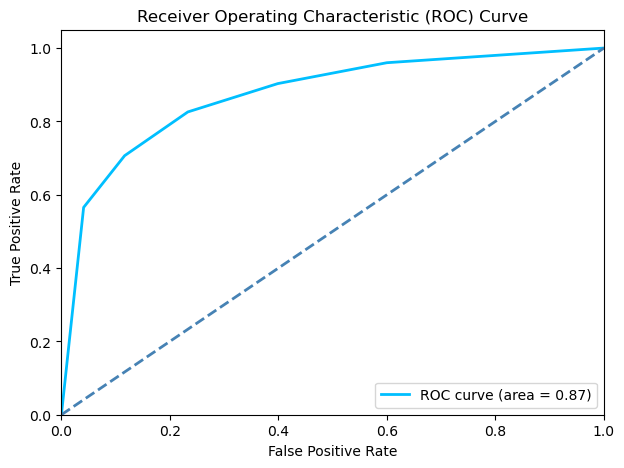

In [58]:
from sklearn import metrics
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = roc_auc_score(y_test, y_pred_prob)

plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='deepskyblue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='steelblue', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.rcParams['font.family'] = 'sans'  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [59]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("Precision:",metrics.recall_score(y_test, y_pred))

Accuracy: 0.7955218966084953
Recall: 0.8257627118644068
Precision: 0.8257627118644068
